In [1]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.5 MB/s eta 0:00:00


In [2]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
# splits = {'en': 'data/en-00000-of-00001.parquet', 'ru': 'data/ru-00000-of-00001.parquet', 'uk': 'data/uk-00000-of-00001.parquet', 'de': 'data/de-00000-of-00001.parquet', 'es': 'data/es-00000-of-00001.parquet', 'am': 'data/am-00000-of-00001.parquet', 'zh': 'data/zh-00000-of-00001.parquet', 'ar': 'data/ar-00000-of-00001.parquet', 'hi': 'data/hi-00000-of-00001.parquet'}
# df = pd.read_parquet("hf://datasets/textdetox/multilingual_toxicity_dataset/" + splits["en"])
# df = df.rename(columns={"toxic":'label'})

df = pd.read_csv("/kaggle/input/assamese-toxic-2/final_data.csv")

df = df[["text", "label"]]

df.head()

,text,label
0,এই টুইটটো এতিয়া পঢ়ি থকা ট্রান্স মহিলাজনী সুন...,0
1,"আহা, মই এলজিবিটি ভাল পাওঁ। মই আমাৰ সমাজত আনসকল...",0
2,রহিত শৰ্মা ৰ পাকিস্তানৰ পৰা ভালপোৱা,0
3,ম এক সানী নাৰীসুলভ টপ হিচাপে মই সকলো পুৰুষ বটম...,0
4,দেলন লভ টাৰ্কি আৰু সাহসী টাৰ্কসকল ভাৰতীয় মুছল...,0


<Axes: ylabel='label'>

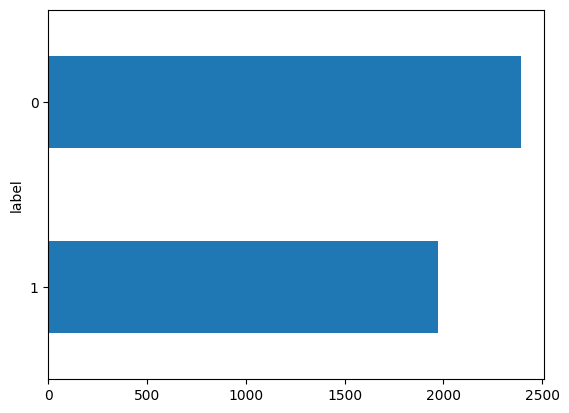

In [3]:
import matplotlib.pyplot as plt

label_counts = df["label"].value_counts(ascending=True)
label_counts.plot.barh()

(0.0, 50.0)

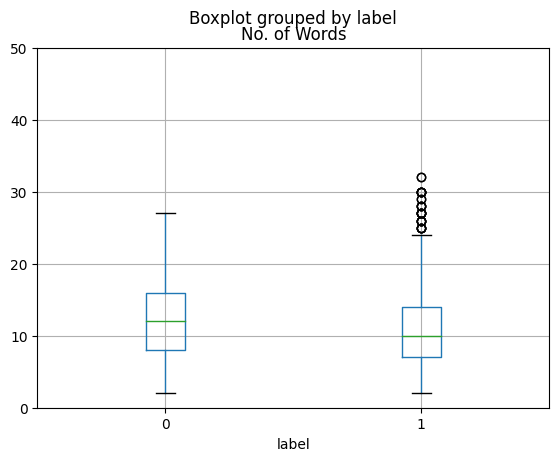

In [4]:
df["No. of Words"] = df['text'].str.split().apply(len)
df.boxplot("No. of Words", by='label')
plt.ylim(0, 50)  # Replace with desired min and max

In [5]:
from transformers import AutoTokenizer

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

# Data Loader and Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify=df["label"])
test, validation = train_test_split(test, test_size=1/3, stratify=test["label"])

train.shape, test.shape, validation.shape

((3054, 3), (873, 3), (437, 3))

In [7]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict(
    {
        'train': Dataset.from_pandas(train, preserve_index=False),
        'test': Dataset.from_pandas(test, preserve_index=False),
        'validation': Dataset.from_pandas(validation, preserve_index=False),
    }
)

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'No. of Words'],
        num_rows: 3054
    })
    test: Dataset({
        features: ['text', 'label', 'No. of Words'],
        num_rows: 873
    })
    validation: Dataset({
        features: ['text', 'label', 'No. of Words'],
        num_rows: 437
    })
})

# Tokenization of Data

In [8]:
dataset['train'][10]

{'text': "তোমাক পাঠাব বলে তেওঁলোকে যাব পাছত নরকলৈ য'ত তোমাৰ ঠাই আছে",
 'label': 1,
 'No. of Words': 11}

In [9]:
def tokenize(batch):
    temp = tokenizer(batch['text'], padding=True, truncation=True)
    return temp

print(tokenize(dataset['train'][:4]))

{'input_ids': [[101, 1376, 29915, 1376, 29898, 29902, 29915, 29882, 1348, 29893, 29917, 1344, 1364, 29917, 29910, 29916, 100, 100, 100, 1370, 29913, 29915, 29909, 29914, 29912, 29889, 29909, 1347, 29898, 29915, 1356, 29917, 29889, 29912, 29915, 102], [101, 100, 100, 1376, 29889, 29911, 29906, 29898, 29914, 1351, 29895, 29914, 100, 100, 100, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1350, 29900, 29914, 29908, 29902, 29916, 29898, 29915, 1351, 29889, 29895, 29915, 1376, 29906, 29903, 29908, 29900, 29914, 29907, 1366, 29907, 1010, 1362, 29885, 1368, 29917, 29910, 29907, 29914, 1344, 102, 0, 0, 0, 0], [101, 1352, 29889, 29917, 1010, 1366, 29914, 29885, 29892, 1355, 29914, 29885, 29894, 100, 1370, 29907, 29914, 29902, 1344, 1353, 29917, 29914, 29902, 1349, 29902, 29892, 29917, 29909, 100, 1029, 102, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,

In [10]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)
dataset_encoded

Map:   0%|          | 0/3054 [00:00<?, ? examples/s]

Map:   0%|          | 0/873 [00:00<?, ? examples/s]

Map:   0%|          | 0/437 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'No. of Words', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3054
    })
    test: Dataset({
        features: ['text', 'label', 'No. of Words', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 873
    })
    validation: Dataset({
        features: ['text', 'label', 'No. of Words', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 437
    })
})

In [11]:
label2id = {x['label']:x['label'] for x in dataset['train']}
label2id

{0: 0, 1: 1}

# Model 

In [12]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [13]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [14]:
model.config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

In [15]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(label2id)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=label2id)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

# Training Args

In [32]:
from transformers import TrainingArguments

batch_size = 32
training_dir = "bert_base_train_dir"

training_args = TrainingArguments(
    output_dir=training_dir,            # Directory to save model outputs
    overwrite_output_dir=True,          # Overwrite existing model output
    num_train_epochs=6,                 # Number of training epochs
    learning_rate=2e-5,                 # Learning rate for optimizer
    per_device_train_batch_size=batch_size,  # Batch size for training
    per_device_eval_batch_size=batch_size,   # Batch size for evaluation
    weight_decay=0.01,                  # Weight decay for regularization
    evaluation_strategy='epoch',        # Evaluate at the end of each epoch
    disable_tqdm=False,                  # Show progress bars
    report_to="none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [33]:
# Build compute metrics function
# !pip install evaluate  # (Optional) Install the evaluate package

import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")  # Load the accuracy metric from evaluate library

def compute_metrics_evaluate(eval_pred):
    predictions, labels = eval_pred  # Unpack predictions and labels
    predictions = np.argmax(predictions, axis=1)  # Convert logits to class labels
    return accuracy.compute(predictions=predictions, references=labels)  # Compute accuracy

In [34]:
# Use sklearn to build compute metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids  # Extract true labels
    preds = pred.predictions.argmax(-1)  # Convert logits to class labels

    f1 = f1_score(labels, preds, average="weighted")  # Compute weighted F1-score
    acc = accuracy_score(labels, preds)  # Compute accuracy

    return {"accuracy": acc, "f1": f1}  # Return metrics as a dictionary

# Build Model and Trainer

In [35]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args,
    compute_metrics = compute_metrics,
    train_dataset = dataset_encoded['train'],
    eval_dataset = dataset_encoded['validation'],
    tokenizer = tokenizer
)

<ipython-input-35-cd2250a84461>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [36]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.353648,0.837529,0.837877
2,No log,0.325402,0.864989,0.863049
3,No log,0.314762,0.860412,0.860242
4,No log,0.321914,0.862700,0.862891
5,No log,0.334053,0.864989,0.864167
6,0.308200,0.339946,0.869565,0.869406


TrainOutput(global_step=576, training_loss=0.2900855723354552, metrics={'train_runtime': 982.7493, 'train_samples_per_second': 18.646, 'train_steps_per_second': 0.586, 'total_flos': 4821246978416640.0, 'train_loss': 0.2900855723354552, 'epoch': 6.0})

# Model Evaluation

In [37]:
preds_output = trainer.predict(dataset_encoded['test'])
preds_output.metrics

{'test_loss': 0.39307868480682373,
 'test_accuracy': 0.8510882016036655,
 'test_f1': 0.85105466753082,
 'test_runtime': 3.7537,
 'test_samples_per_second': 232.573,
 'test_steps_per_second': 7.459}

In [38]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = dataset_encoded['test'][:]['label']

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       478
           1       0.84      0.83      0.84       395

    accuracy                           0.85       873
   macro avg       0.85      0.85      0.85       873
weighted avg       0.85      0.85      0.85       873



In [40]:
# plot confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

<Axes: >

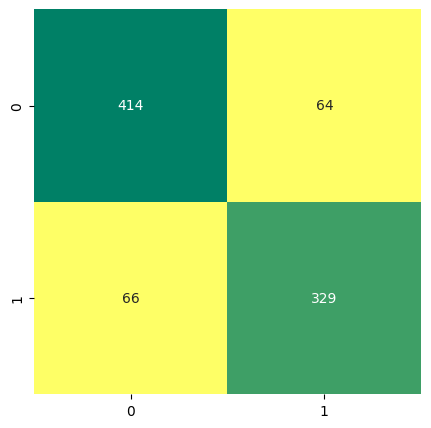

In [41]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='summer_r')